# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Bagas Andreanto   
**NIM:** 122140017

**Link Repository Github:** [Bagas_122140017_Handson](https://github.com/bagas017/Bagas_122140017_Hands-on-Multimedia)

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

Import Library yang dibutuhkan

In [242]:
# Import Library yang dibutuhkan
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import os 
import urllib.request
import dlib



# Cek versi library yang diinstal
print(f"Versi numpy: {np.__version__}")
print(f"Versi matplotlib: {plt.matplotlib.__version__}")
print(f"Versi OpenCV: {cv2.__version__}")

Versi numpy: 2.2.6
Versi matplotlib: 3.10.7
Versi OpenCV: 4.12.0


### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.
* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


#### **Jawab soal 1:**

1. Inisiasi path gambar soal 1 dan menampilkan gambar serta infromasi img shapenya.

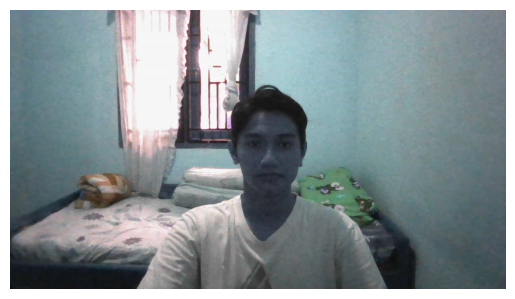

Shape gambar soal 1: (720, 1280, 3)


In [243]:
# Path gambar
img_path_soal1 = os.path.join(os.getcwd(), 'assets_ws4', 'soal1OG.jpg')


# Baca gambar
img_soal1 = cv2.imread(img_path_soal1)

# Tampilkan gambar dengan matplotlib
plt.imshow(img_soal1)
plt.axis('off')
plt.show()

print("Shape gambar soal 1:", img_soal1.shape)


2. Melakukan cropping pada area wajah dan latar belakang, lalu menampilkan hasilnya.

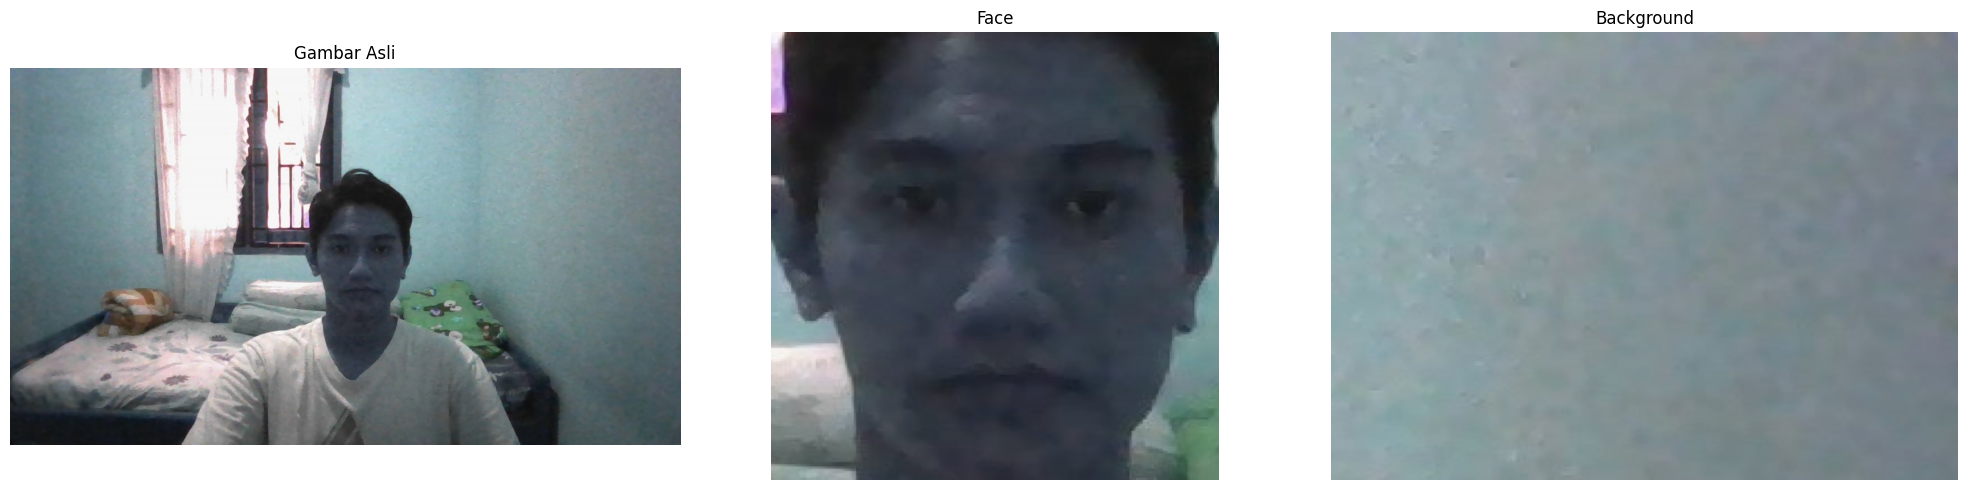

True

In [244]:
# Melakukan pemotongan
img_cropped_face =  img_soal1[270:470, 565:765] 
img_cropped_background = img_soal1[0:200, 1000:1280]

# Plot gambar
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Original no Crop
axs[0].imshow(img_soal1)
axs[0].set_title('Gambar Asli')
axs[0].axis('off')

# Original cropped image
axs[1].imshow(img_cropped_face)
axs[1].set_title('Face')
axs[1].axis('off')

# Background cropped image
axs[2].imshow(img_cropped_background)
axs[2].set_title('Background')
axs[2].axis('off')


plt.tight_layout()
plt.show()


# Simpan Hasil Modifikasi
output_dir = os.path.join(os.getcwd(), 'results_ws4')
os.makedirs(output_dir, exist_ok=True)

output_path_face = os.path.join(output_dir, 'Soal1_Face_Cropped.jpg')
cv2.imwrite(output_path_face, img_cropped_face)

output_path_background = os.path.join(output_dir, 'Soal1_Background_Cropped.jpg')
cv2.imwrite(output_path_background, img_cropped_background)

3. Resize hasil crop menjadi 920x920 piksel.

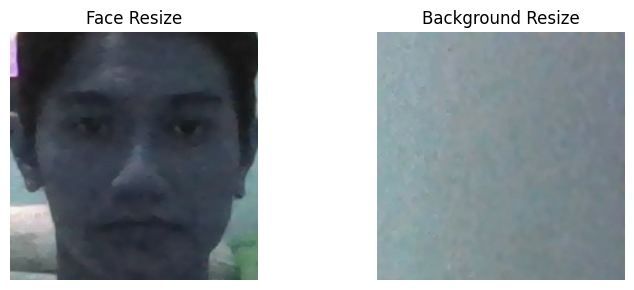

Shape wajah sebelum resize: (200, 200, 3)
Shape wajah setelah resize: (920, 920, 3)
Shape background sebelum resize: (200, 280, 3)
Shape background setelah resize: (920, 920, 3)


True

In [245]:
# Resize cropped image to 920x920 pixels
img_face_resized = cv2.resize(img_cropped_face, (920, 920))
img_background_resized = cv2.resize(img_cropped_background, (920, 920))

# Plot gambar
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Original cropped image
axs[0].imshow(img_face_resized)
axs[0].set_title('Face Resize')
axs[0].axis('off')

# Background resized image
axs[1].imshow(img_background_resized)
axs[1].set_title('Background Resize')
axs[1].axis('off')

plt.tight_layout()
plt.show()

# Print shape before and after resize
print("Shape wajah sebelum resize:", img_cropped_face.shape)
print("Shape wajah setelah resize:", img_face_resized.shape)
print("Shape background sebelum resize:", img_cropped_background.shape)
print("Shape background setelah resize:", img_background_resized.shape)

# Simpan hasil modifikasi gambar
output_path_face_resized = os.path.join(output_dir, 'Soal1_Face_Resized.jpg')
cv2.imwrite(output_path_face_resized, img_face_resized)

output_path_background_resized = os.path.join(output_dir, 'Soal1_Background_Resized.jpg')
cv2.imwrite(output_path_background_resized, img_background_resized)

4. Konversi gambar menjadi grayscale dan HSV, lalu menampilkan ketiganya berdampingan.

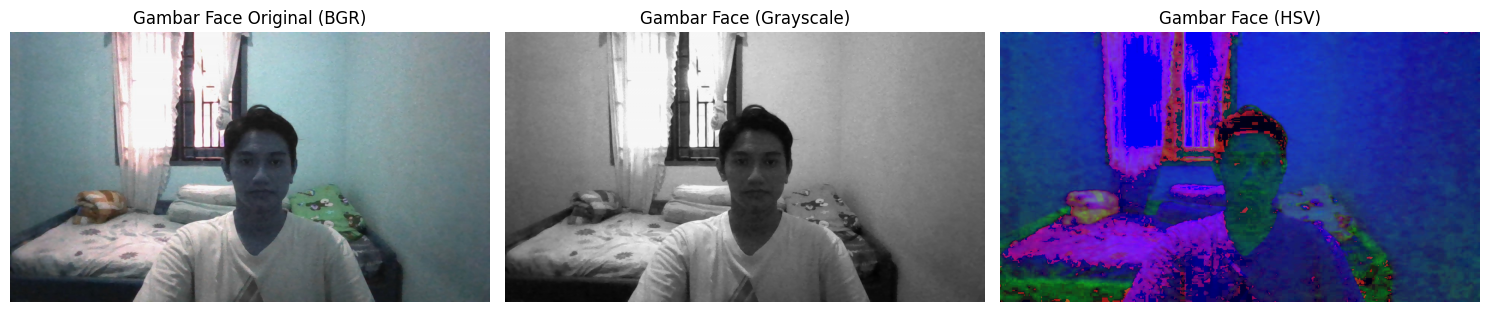

True

In [246]:
# Konversi RGB ke Grayscale dan HSV untuk img
img_gray = cv2.cvtColor(img_soal1, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img_soal1, cv2.COLOR_BGR2HSV)

# Plot hasil konversi
fig, axs = plt.subplots(1, 3, figsize=(15, 10))


axs[0].imshow(img_soal1)
axs[0].set_title("Gambar Face Original (BGR)")
axs[0].axis('off')
axs[1].imshow(img_gray, cmap='gray')
axs[1].set_title("Gambar Face (Grayscale)")
axs[1].axis('off')
axs[2].imshow(img_hsv)
axs[2].set_title("Gambar Face (HSV)")
axs[2].axis('off')

plt.tight_layout()
plt.show()


# Simpan hasil konversi
output_path_gray = os.path.join(output_dir, 'Soal1_Face_Grayscale.jpg')
cv2.imwrite(output_path_gray, img_gray)

output_path_hsv = os.path.join(output_dir, 'Soal1_Face_HSV.jpg')
cv2.imwrite(output_path_hsv, img_hsv)

5. Menambahkan anotasi teks berisi nama di atas kepala pada gambar hasil crop.

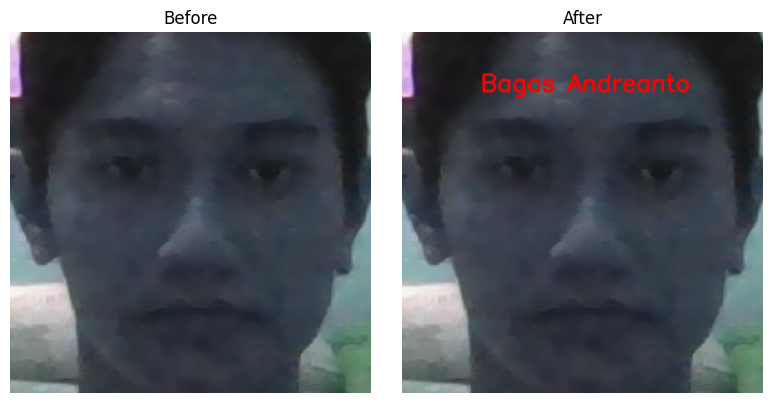

True

In [247]:
img_face_with_name = img_face_resized.copy()

# Menambahkan teks di atas kepala
cv2.putText(img_face_with_name, "Bagas Andreanto", (200, 150), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 6)

# Tampilkan gambar before dan after 
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(img_face_resized)
axs[0].set_title("Before")
axs[0].axis('off')

axs[1].imshow(img_face_with_name)
axs[1].set_title("After")
axs[1].axis('off')

plt.tight_layout()
plt.show()

# Simpan hasil gambar dengan teks
output_path_face_with_name = os.path.join(output_dir, 'Soal1_Face_With_Name.jpg')
cv2.imwrite(output_path_face_with_name, img_face_with_name) 

#### **Jelaskan efek cropping dan perubahan warna menggunakan Markdown:**

1. Cropping adalah proses memotong bagian tertentu dari sebuah gambar sehingga menghasilkan gambar baru dengan ukuran serta area yang lebih kecil dari gambar aslinya. penjelasan proses Cropping yang dilakukan:

        img_cropped_face =  img_soal1[270:470, 565:765]

    Mengambil area pada gambar dari rentang piksel 270 hingga 470 pada sumbu vertikal dan 565 hingga 765 pada sumbu horizontal. Sehingga menghasilkan gambar baru yang berukuran 200x200 piksel yang hanya menampilkan area wajah. 
    

        img_cropped_background = img_soal1[0:200, 1000:1280]
    
    Kemudian untuk cropping latar belakang, mengambil area dari rentang piksel 0 hingga 200 pada sumbu vertikal dan 1000 hingga 1280 pada sumbu horizontal. Sehingga menghasilkan gambar baru yang berukuran 200x280 piksel yang hanya menampilkan area latar belakang.



2. Perubahan warna pada gambar dilakukan dengan mengkonversi gambar dari format warna RGB (Red, Green, Blue) atau BGR (format default cv2) ke format Grayscale dan HSV (Hue, Saturation, Value). Penjelasan proses perubahan warna yang dilakukan:

        img_gray = cv2.cvtColor(img_soal1, cv2.COLOR_BGR2GRAY)
        img_hsv = cv2.cvtColor(img_soal1, cv2.COLOR_BGR2HSV)
    
    Untuk gambar asli yang diload dengan cv2 akan memiliki format warna bawaan yaitu BGR (Blue, Green, Red). Konversi ke Grayscale mengubah gambar menjadi skala abu-abu dimana setiap piksel hanya memiliki intensitas cahaya tanpa informasi warna. Sedangkan konversi ke HSV mengubah representasi warna menjadi tiga komponen: Hue (warna), Saturation (kekuatan warna), dan Value (kecerahan).

### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


#### **Jawab soal 2:**

1. Konversi gambar hasil crop ke ruang warna RGB.

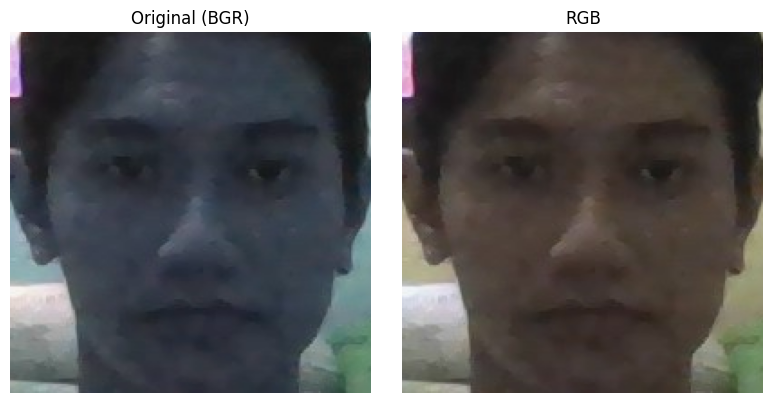

In [248]:
img2_rgb = cv2.cvtColor(img_cropped_face, cv2.COLOR_BGR2RGB)

# Plot gambar
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Original cropped image
axs[0].imshow(img_cropped_face)
axs[0].set_title('Original (BGR)')
axs[0].axis('off')

# Background resized image
axs[1].imshow(img2_rgb)
axs[1].set_title('RGB')
axs[1].axis('off')

plt.tight_layout()
plt.show()

2. Manipulasi channel warna dengan menaikkan intensitas channel merah sebanyak 50 poin dan menurunkan intensitas channel biru sebanyak 30 poin.

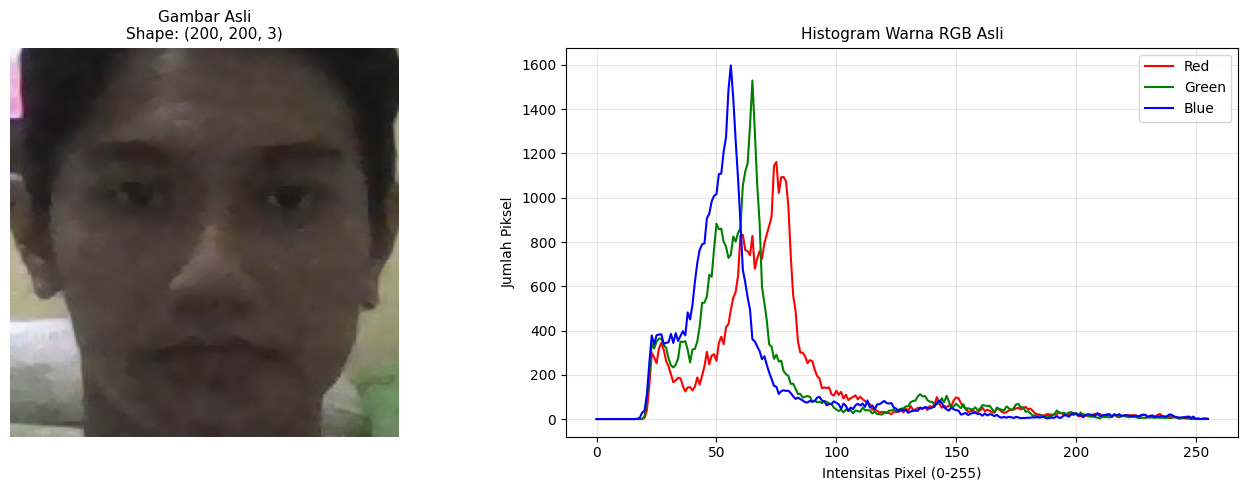

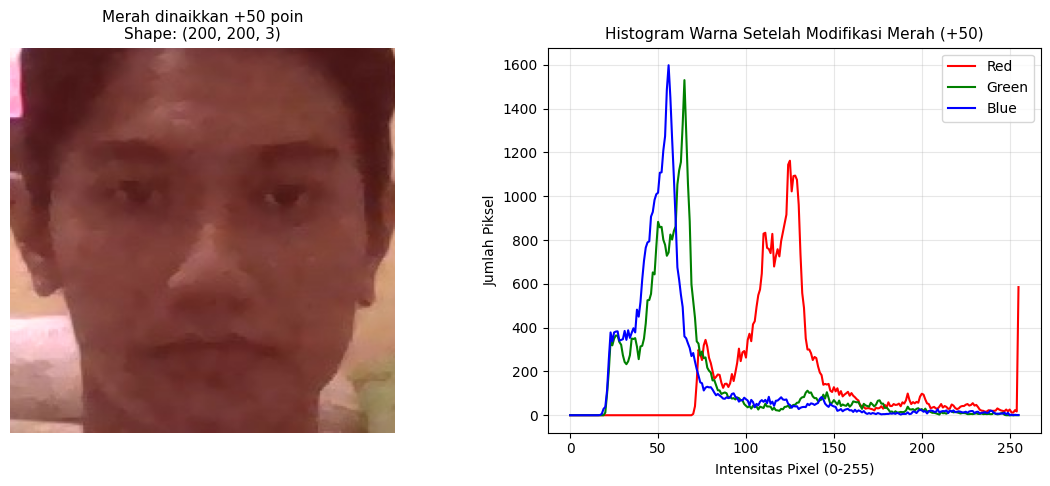

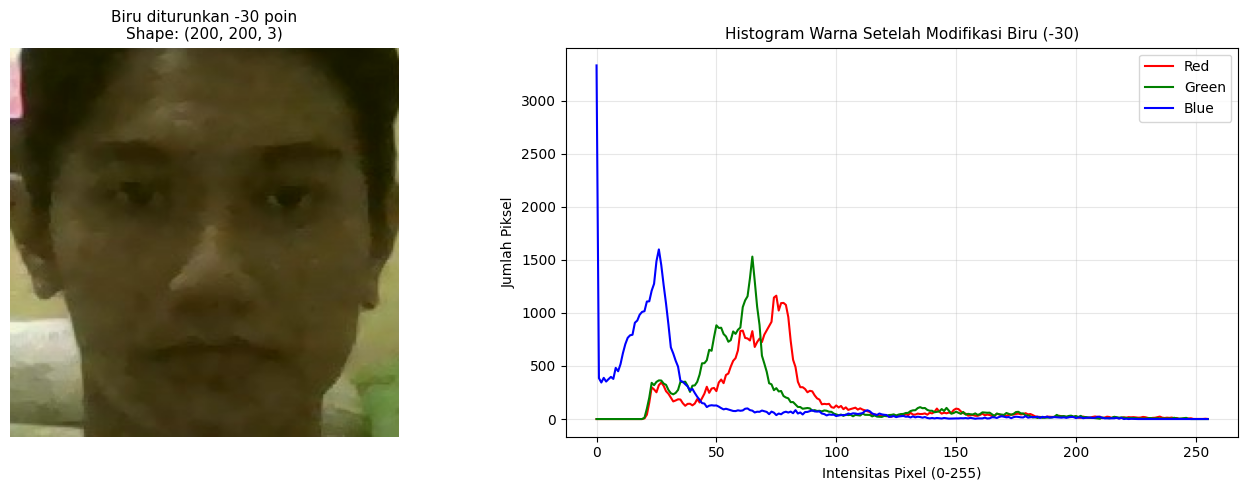

In [249]:
# Tampilkan gambar + histogram dalam 1 layout
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gambar asli
axs[0].imshow(img2_rgb)
axs[0].set_title(f"Gambar Asli\nShape: {img2_rgb.shape}", fontsize=11)
axs[0].axis('off')

# Histogram RGB asli
colors = ('r','g','b')
labels = ('Red','Green','Blue')
for i, (col, label) in enumerate(zip(colors, labels)):
    hist = cv2.calcHist([img2_rgb], [i], None, [256], [0,256])
    axs[1].plot(hist, color=col, label=label)

axs[1].set_title("Histogram Warna RGB Asli", fontsize=11)
axs[1].set_xlabel("Intensitas Pixel (0-255)")
axs[1].set_ylabel("Jumlah Piksel")
axs[1].legend()
axs[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Modifikasi: menaikkan intensitas channel merah sebanyak 50 poin
img2_mod_red = img2_rgb.copy().astype(np.int16)
img2_mod_red[:,:,0] = np.clip(img2_mod_red[:,:,0] + 50, 0, 255)
img2_mod_red = img2_mod_red.astype(np.uint8)

# Tampilkan gambar hasil modifikasi
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gambar hasil modifikasi merah
axs[0].imshow(img2_mod_red)
axs[0].set_title("Merah dinaikkan +50 poin\nShape: {}".format(img2_mod_red.shape), fontsize=11)
axs[0].axis('off')

# Histogram setelah modifikasi
for i, (col, label) in enumerate(zip(colors, labels)):
    hist = cv2.calcHist([img2_mod_red], [i], None, [256], [0,256])
    axs[1].plot(hist, color=col, label=label)

axs[1].set_title("Histogram Warna Setelah Modifikasi Merah (+50)", fontsize=11)
axs[1].set_xlabel("Intensitas Pixel (0-255)")
axs[1].set_ylabel("Jumlah Piksel")
axs[1].legend()
axs[1].grid(True, alpha=0.3)


# Modifikasi: menurunkan intensitas channel biru sebanyak 30 poin
img2_mod_blue = img2_rgb.copy().astype(np.int16)
img2_mod_blue[:,:,2] = np.clip(img2_mod_blue[:,:,2] - 30, 0, 255)
img2_mod_blue = img2_mod_blue.astype(np.uint8)

# Tampilkan gambar hasil modifikasi
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gambar hasil modifikasi biru
axs[0].imshow(img2_mod_blue)
axs[0].set_title("Biru diturunkan -30 poin\nShape: {}".format(img2_mod_blue.shape), fontsize=11)
axs[0].axis('off')

# Histogram setelah modifikasi
for i, (col, label) in enumerate(zip(colors, labels)):
    hist = cv2.calcHist([img2_mod_blue], [i], None, [256], [0,256])
    axs[1].plot(hist, color=col, label=label)

axs[1].set_title("Histogram Warna Setelah Modifikasi Biru (-30)", fontsize=11)
axs[1].set_xlabel("Intensitas Pixel (0-255)")
axs[1].set_ylabel("Jumlah Piksel")
axs[1].legend()
axs[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


3. Gabungkan kembali channel warna dan simpan gambar hasil modifikasi dalam format .png.

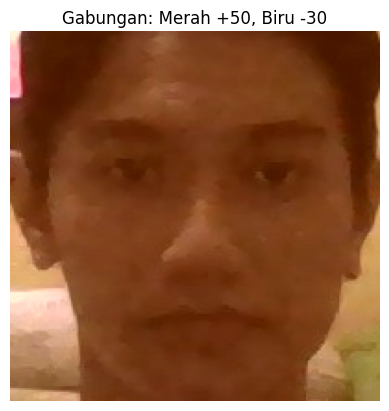

✅ Gambar berhasil disimpan sebagai c:\Users\Pongo\OneDrive\Desktop\Git-Upload\Hands-on_Multimedia\results_ws4\Soal2_Combined_Modified.png


In [250]:
img2_combined = img2_rgb.copy().astype(np.int16)

img2_combined[:,:,0] = np.clip(img2_combined[:,:,0] + 50, 0, 255)

img2_combined[:,:,2] = np.clip(img2_combined[:,:,2] - 30, 0, 255)

# Kembalikan ke format uint8 agar bisa disimpan dan ditampilkan
img2_combined = img2_combined.astype(np.uint8)

# Tampilkan hasil gabungan
plt.imshow(img2_combined)
plt.title("Gabungan: Merah +50, Biru -30")
plt.axis('off')
plt.show()

# Simpan hasil ke file PNG
output_path_combined = os.path.join(output_dir, 'Soal2_Combined_Modified.png')
cv2.imwrite(output_path_combined, cv2.cvtColor(img2_combined, cv2.COLOR_RGB2BGR))
print(f"✅ Gambar berhasil disimpan sebagai {output_path_combined}")

4. Tampilkan histogram per channel (R, G, B) untuk gambar asli dan hasil modifikasi menggunakan matplotlib.pyplot.hist.

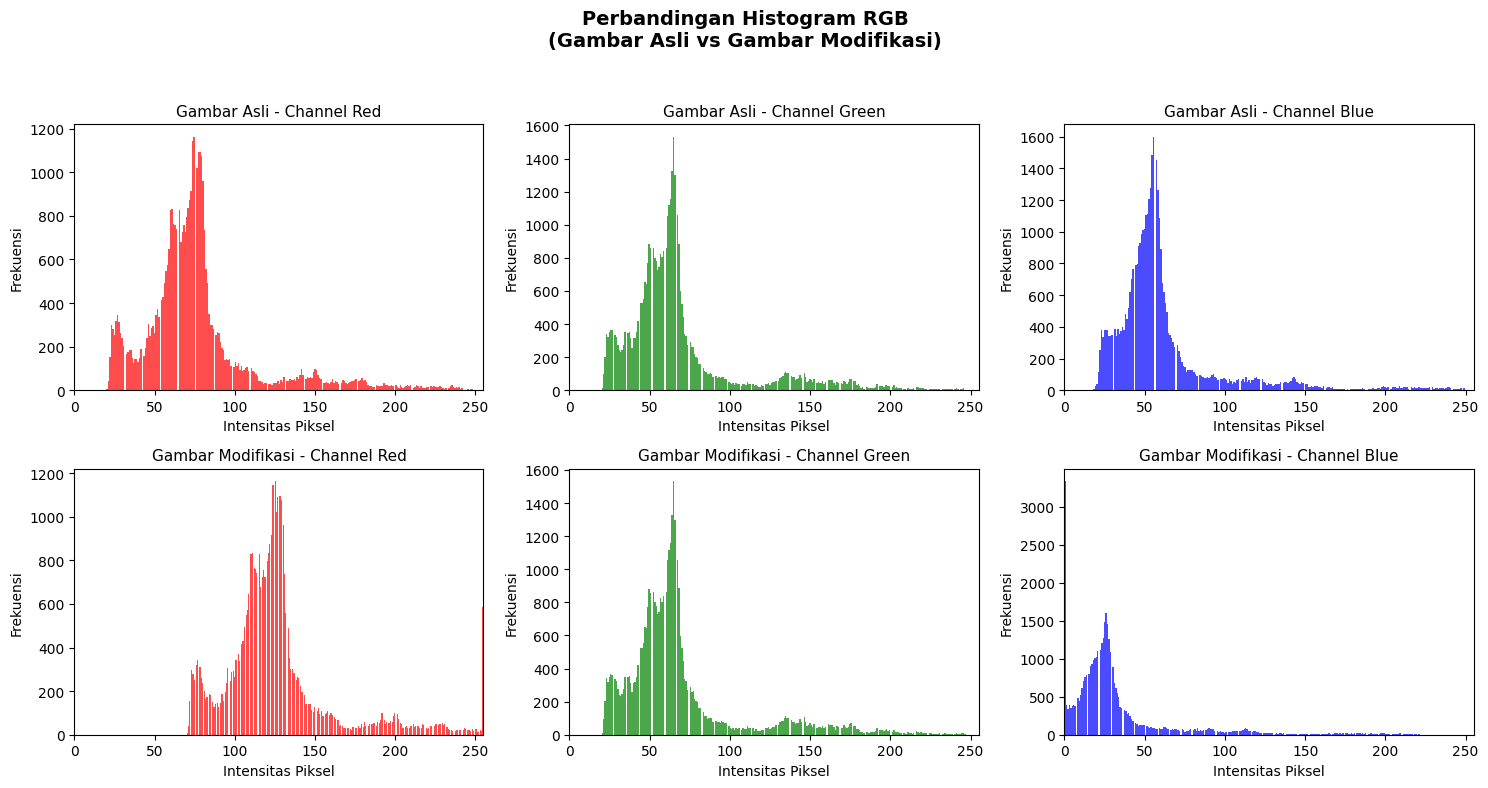

In [251]:
# Siapkan figure untuk menampilkan hasil
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Warna dan label channel
colors = ('r', 'g', 'b')
labels = ('Red', 'Green', 'Blue')

# ===== Histogram gambar asli =====
for i, (col, label) in enumerate(zip(colors, labels)):
    axs[0, i].hist(img2_rgb[:, :, i].ravel(), bins=256, color=col, alpha=0.7)
    axs[0, i].set_title(f"Gambar Asli - Channel {label}", fontsize=11)
    axs[0, i].set_xlim([0, 255])
    axs[0, i].set_xlabel("Intensitas Piksel")
    axs[0, i].set_ylabel("Frekuensi")

# ===== Histogram gambar hasil modifikasi =====
for i, (col, label) in enumerate(zip(colors, labels)):
    axs[1, i].hist(img2_combined[:, :, i].ravel(), bins=256, color=col, alpha=0.7)
    axs[1, i].set_title(f"Gambar Modifikasi - Channel {label}", fontsize=11)
    axs[1, i].set_xlim([0, 255])
    axs[1, i].set_xlabel("Intensitas Piksel")
    axs[1, i].set_ylabel("Frekuensi")

# ===== Atur tampilan layout =====
fig.suptitle("Perbandingan Histogram RGB\n(Gambar Asli vs Gambar Modifikasi)", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### **Jelaskan dampak perubahan RGB pada warna gambar:**

Perubahan intensitas pada channel warna RGB (Red, Green, Blue) akan mempengaruhi tampilan warna keseluruhan dari gambar. Berikut adalah dampak dari perubahan yang dilakukan:
1. Ketika intensitas channel merah dinaikkan sebanyak 50 poin, warna merah pada gambar akan menjadi lebih dominan. Hal ini dapat membuat warna gambar terlihat sangat merah.
2. Kemudian ketika intensitas channel biru diturunkan sebanyak 30 poin, warna biru pada gambar akan menjadi lebih redup. Hal ini dapat mengurangi kecerahan warna biru pada gambar. Sehingga warna gambar menjadi terlihat lebih kuning.

### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


#### **Jawab soal 3:**

1. Gambar objek dengan background bertekstur.

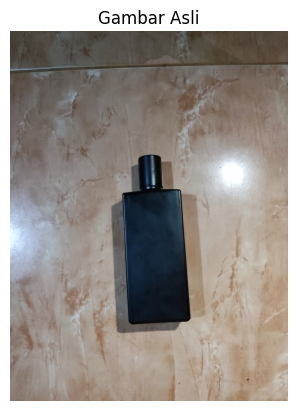

In [252]:
# Inisiasi path
img3 = os.path.join(os.getcwd(), 'assets_ws4', 'soal3OG.jpg')

# Baca gambar
img3 = cv2.imread(img3)

# Konversi ke RGB
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Tampilkan gambar asli
plt.imshow(img3_rgb)
plt.title("Gambar Asli")
plt.axis('off')
plt.show()


2. Edge detection (Canny) dan menampilkan hasilnya.

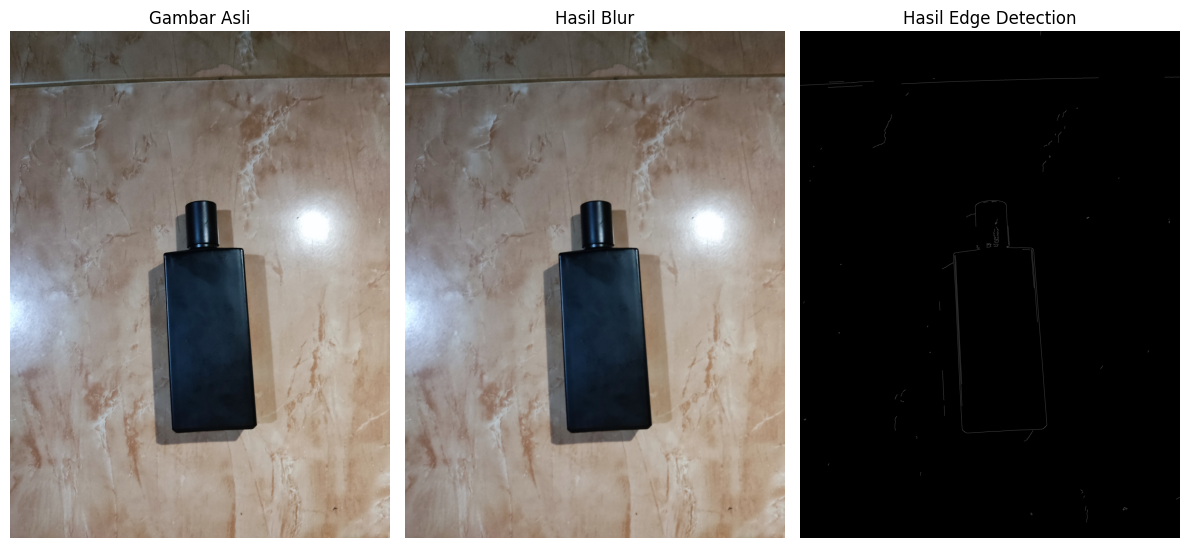

✅ Hasil edge detection disimpan sebagai c:\Users\Pongo\OneDrive\Desktop\Git-Upload\Hands-on_Multimedia\results_ws4\Soal3_Edge_Detection.jpg


In [253]:
img3_blur = cv2.GaussianBlur(img3_rgb, (11, 11), 0)

# Canny Edge Detection
edges = cv2.Canny(img3_blur, 50, 90)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 7))

# Gambar Asli
axs[0].imshow(img3_rgb)
axs[0].set_title('Gambar Asli')
axs[0].axis('off')

# Hasil Blur
axs[1].imshow(img3_blur)
axs[1].set_title('Hasil Blur')
axs[1].axis('off')

# Hasil Edge Detection
axs[2].imshow(edges, cmap='gray')
axs[2].set_title('Hasil Edge Detection')
axs[2].axis('off')

plt.tight_layout()
plt.show()

# Simpan hasil edge detection
output_path_edges = os.path.join(output_dir, 'Soal3_Edge_Detection.jpg')
cv2.imwrite(output_path_edges, edges)
print(f"✅ Hasil edge detection disimpan sebagai {output_path_edges}")

3. Membuat bounding box di sekitar objek hasil segmentasi.

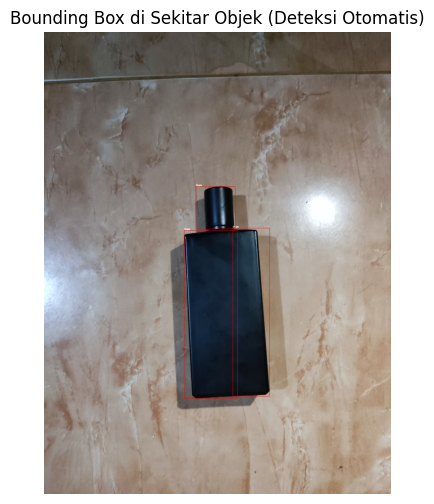

✅ Hasil bounding box disimpan sebagai c:\Users\Pongo\OneDrive\Desktop\Git-Upload\Hands-on_Multimedia\results_ws4\Soal3_Bounding_Boxes.jpg


In [254]:
# Cari kontur dari hasil tepi 
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Buat salinan gambar RGB untuk menampilkan hasil kotak
img_bboxes = img3_rgb.copy()

# Loop setiap kontur dan buat bounding box di sekitarnya
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # Filter ukuran (biar tidak kotak kecil dari noise)
    if w > 100 and h > 80:  
        cv2.rectangle(img_bboxes, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Biru (BGR)
        cv2.putText(img_bboxes, "Objek", (x, y - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

# Tampilkan hasil
plt.figure(figsize=(8, 6))
plt.imshow(img_bboxes)
plt.title("Bounding Box di Sekitar Objek (Deteksi Otomatis)")
plt.axis('off')
plt.show()

# Simpan hasil bounding box
output_path_bboxes = os.path.join(output_dir, 'Soal3_Bounding_Boxes.jpg')
cv2.imwrite(output_path_bboxes, cv2.cvtColor(img_bboxes, cv2.COLOR_RGB2BGR))
print(f"✅ Hasil bounding box disimpan sebagai {output_path_bboxes}")

4. Menerapkan filter blur dan filter sharpening, lalu membandingkan hasil keduanya.

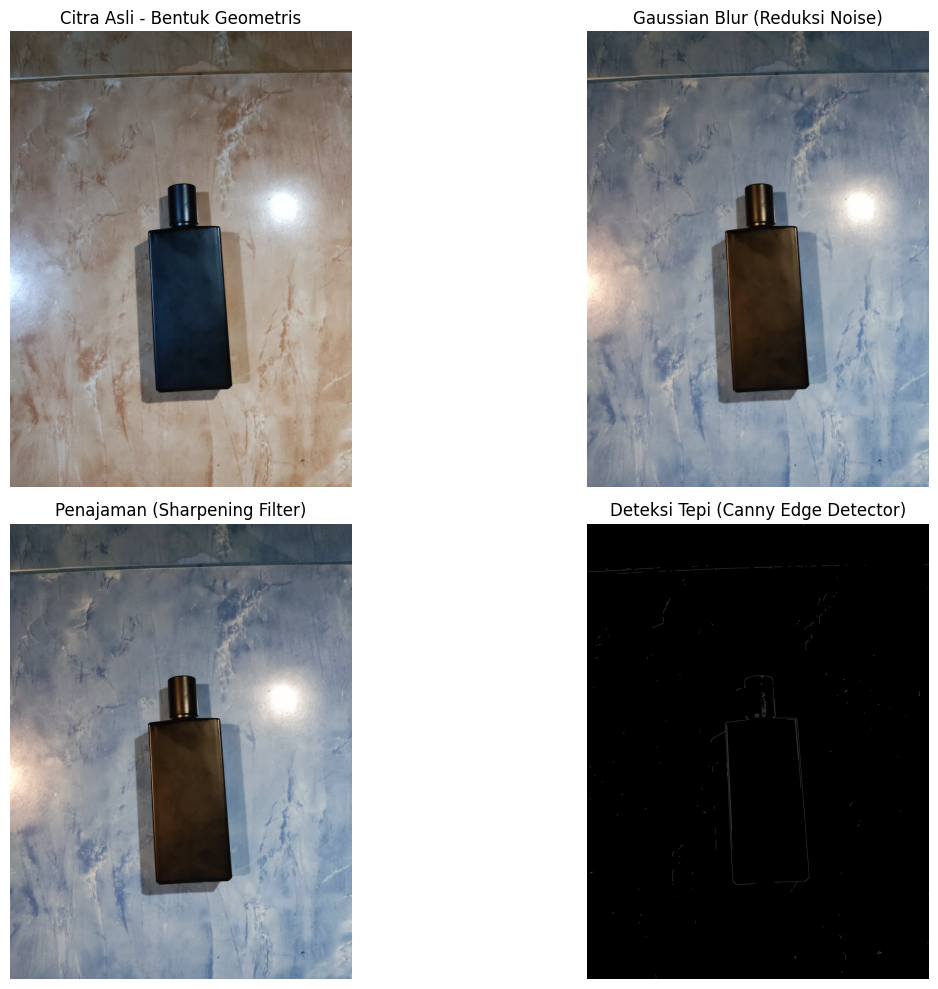

In [255]:
# Gaussian Blur (reduksi noise)
blur = cv2.GaussianBlur(img3_rgb, (5, 5), 0)
blur_rgb = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)

# Sharpening (penajaman)
kernel_sharp = np.array([[0, -1, 0],
 [-1, 5, -1],
 [0, -1, 0]])
sharp = cv2.filter2D(img3_rgb, -1, kernel_sharp)
sharp_rgb = cv2.cvtColor(sharp, cv2.COLOR_BGR2RGB)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(blur, 70, 120)

# Susun canvas 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Citra Asli
axes[0, 0].imshow(img3_rgb)
axes[0, 0].set_title("Citra Asli - Bentuk Geometris", fontsize=12)
axes[0, 0].axis("off")
# 2. Gaussian Blur
axes[0, 1].imshow(blur_rgb)
axes[0, 1].set_title("Gaussian Blur (Reduksi Noise)", fontsize=12)
axes[0, 1].axis("off")
# 3. Sharpening
axes[1, 0].imshow(sharp_rgb)
axes[1, 0].set_title("Penajaman (Sharpening Filter)", fontsize=12)
axes[1, 0].axis("off")
# 4. Deteksi Tepi Canny
axes[1, 1].imshow(edges, cmap='gray')
axes[1, 1].set_title("Deteksi Tepi (Canny Edge Detector)", fontsize=12)
axes[1, 1].axis("off")

# layout
plt.tight_layout()
plt.show()

#### **Penjelasan pengaruh filter Gaussian Blur dan Sharpening:**

1. **Gaussian Blur**: Filter ini digunakan untuk mengurangi noise dan detail yang ada pada background bertekstur. Dengan menerapkan Gaussian Blur, gambar menjadi lebih halus sehingga tracehold deteksi tepi bisa lebih kecil jika menggunakan gambar yang di blur.

2. **Sharpening**: Filter ini digunakan untuk menajamkan detail pada gambar. Dengan menerapkan filter sharpening, tepi-tepi objek menjadi lebih jelas dan kontras, sehingga objek utama lebih menonjol dari background. Namun, jika diterapkan pada gambar yang sudah di blur, hasilnya mungkin tidak seefektif pada gambar asli karena detail yang sudah hilang akibat blur.

Hasil dari bounding box yang terbentuk mendeteksi beberapa bagian sudut dari objek yang sebelumnya sudah di deteksi menggunakan edge detection Canny yang kurang terlihat jelas, karena bentuk objek (Botol Parfume) memiliki banyak sudut sehingga hasil bounding boxnya sedikit kurang sesuai

### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

Inisiasi Path Gambar Soal 4 dan menampilkan gambar serta informasi img shapenya.

In [256]:
# Load the image
img4_path = os.path.join(os.getcwd(), 'assets_ws4', 'soal4OG.jpg')
img_original = cv2.imread(img4_path)


img_dlib = img_original.copy()

# Convert to grayscale for processing
gray_faces = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
print(f"Ukuran gambar: {img_original.shape}")
print("Memproses deteksi wajah...")


Ukuran gambar: (5184, 3880, 3)
Memproses deteksi wajah...


Deteksi wajah dan landmark menggunakan Dlib.

dlib mendeteksi: 1 wajah
Detail deteksi dlib:
 Wajah #1: posisi (717,1484), ukuran 2302x2301


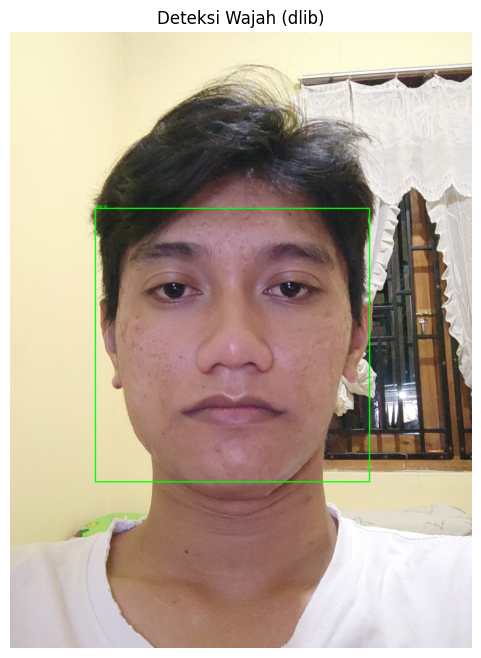

✅ Hasil deteksi wajah disimpan sebagai c:\Users\Pongo\OneDrive\Desktop\Git-Upload\Hands-on_Multimedia\results_ws4\Soal4_Dlib_Face_Detection.jpg


In [257]:
# Initialize dlib's face detector
detector = dlib.get_frontal_face_detector()

# Detect faces using dlib
faces_dlib = detector(gray_faces)

# Draw rectangles and labels for dlib
for idx, face in enumerate(faces_dlib):
   x, y = face.left(), face.top()
   w, h = face.width(), face.height()
   # Gambar kotak hijau untuk dlib
   cv2.rectangle(img_dlib, (x, y), (x + w, y + h), (0, 255, 0), 10)
   # Label dengan nomor urut
   label = f"Wajah #{idx+1}"
   cv2.putText(img_dlib, label, (x, y - 10),
               cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    
print(f"dlib mendeteksi: {len(faces_dlib)} wajah")
if len(faces_dlib) > 0:
    print("Detail deteksi dlib:")
    for idx, face in enumerate(faces_dlib):
        x, y = face.left(), face.top()
        w, h = face.width(), face.height()
        print(f" Wajah #{idx+1}: posisi ({x},{y}), ukuran {w}x{h}")

# Tampilkan hasil deteksi wajah
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_dlib, cv2.COLOR_BGR2RGB))
plt.title("Deteksi Wajah (dlib)")
plt.axis('off')
plt.show()

# Simpan hasil deteksi wajah
output_path_dlib = os.path.join(output_dir, 'Soal4_Dlib_Face_Detection.jpg')
cv2.imwrite(output_path_dlib, img_dlib)
print(f"✅ Hasil deteksi wajah disimpan sebagai {output_path_dlib}")

Menampilkan landmark wajah pada gambar asli dengan menggunakan model shape_predictor_68_face_landmarks.dat dari Dlib.

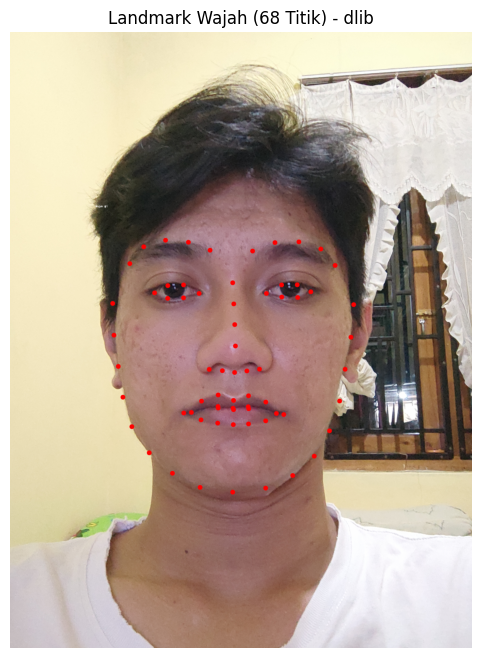

✅ Hasil landmark wajah disimpan sebagai c:\Users\Pongo\OneDrive\Desktop\Git-Upload\Hands-on_Multimedia\results_ws4\Soal4_Dlib_Face_Landmarks.jpg


In [258]:


# Path penyimpanan model
predictor_path = os.path.join(os.getcwd(), "shape_predictor_68_face_landmarks.dat")

# Jika file belum ada → download otomatis dari GitHub mirror
if not os.path.exists(predictor_path):
    print("🔽 Mengunduh model landmark dlib (sekali saja, ukuran ~100MB)...")
    url = "https://github.com/italojs/facial-landmarks-recognition/raw/master/shape_predictor_68_face_landmarks.dat"
    urllib.request.urlretrieve(url, predictor_path)
    print("✅ Unduhan selesai!")

# Load model predictor
predictor = dlib.shape_predictor(predictor_path)

# Gunakan hasil deteksi wajah sebelumnya
img_landmark = img_original.copy()

# Gambar landmark untuk tiap wajah
for idx, face in enumerate(faces_dlib):
    landmarks = predictor(gray_faces, face)
    for n in range(68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(img_landmark, (x, y), 20, (0, 0, 255), -1)
    cv2.putText(img_landmark, f"Wajah #{idx+1}",
                (face.left(), face.top()-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

# Tampilkan hasil
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_landmark, cv2.COLOR_BGR2RGB))
plt.title("Landmark Wajah (68 Titik) - dlib")
plt.axis('off')
plt.show()

# Simpan hasil landmark wajah
output_path_landmark = os.path.join(output_dir, 'Soal4_Dlib_Face_Landmarks.jpg')
cv2.imwrite(output_path_landmark, img_landmark)
print(f"✅ Hasil landmark wajah disimpan sebagai {output_path_landmark}")

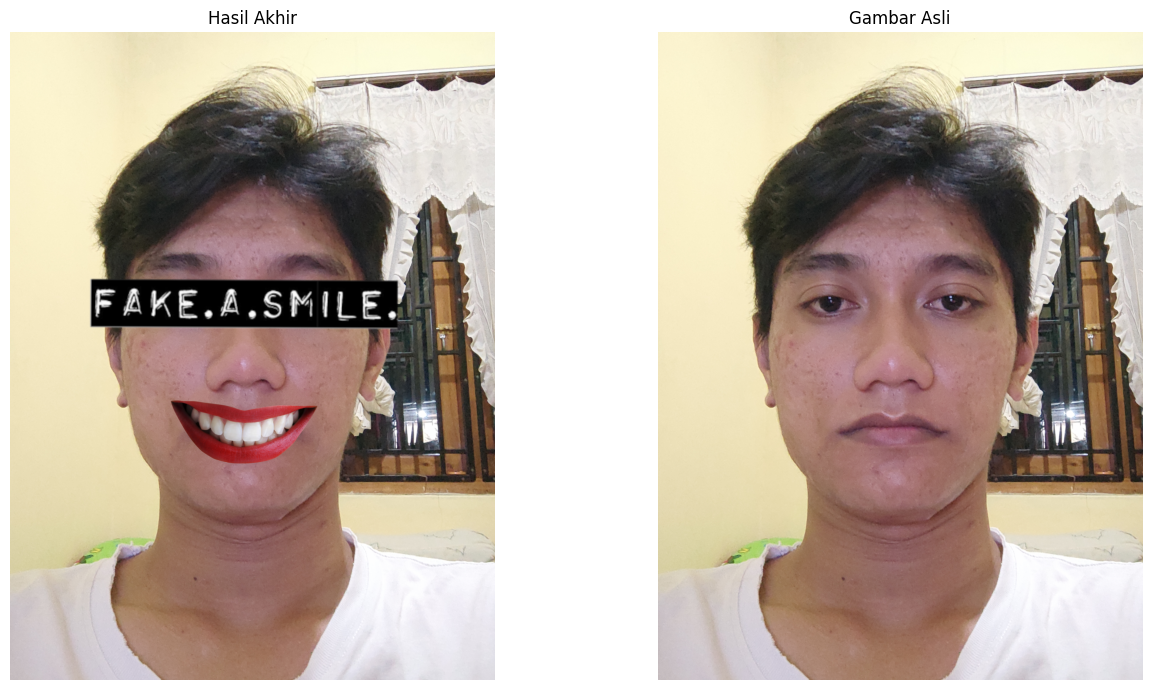

✅ Hasil gambar dengan aksesoris disimpan sebagai c:\Users\Pongo\OneDrive\Desktop\Git-Upload\Hands-on_Multimedia\results_ws4\Soal4_Face_With_Accessories.jpg


In [259]:
# --- Load gambar overlay (aksesoris mata) ---
glasses_png_path = os.path.join(os.getcwd(), 'assets_ws4', 'soal4_fakesmile.png')  # RGBA
glasses_png = cv2.imread(glasses_png_path, cv2.IMREAD_UNCHANGED)
if glasses_png is None:
    raise ValueError("Gagal memuat gambar 'soal4_fakesmile.png'!")

# --- Load gambar overlay (aksesoris mulut) ---
mouth_png_path = os.path.join(os.getcwd(), 'assets_ws4', 'soal4_realsmile.png')  # RGBA
mouth_png = cv2.imread(mouth_png_path, cv2.IMREAD_UNCHANGED)
if mouth_png is None:
    raise ValueError("Gagal memuat gambar 'soal4_fakemouth.png'!")

img_overlay = img_original.copy()

for face in faces_dlib:
    landmarks = predictor(gray_faces, face)

    # --- Dapatkan koordinat sekitar mata ---
    left_eye_pts = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 42)])
    right_eye_pts = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(42, 48)])

    left_eye_center = left_eye_pts.mean(axis=0).astype("int")
    right_eye_center = right_eye_pts.mean(axis=0).astype("int")

    # Hitung sudut dan jarak antar mata
    dx = right_eye_center[0] - left_eye_center[0]
    dy = right_eye_center[1] - left_eye_center[1]
    angle = np.degrees(np.arctan2(dy, dx))
    eye_distance = np.linalg.norm(right_eye_center - left_eye_center)

    # --- Skala overlay agar proporsional dengan jarak antar mata ---
    scale = eye_distance / glasses_png.shape[1] * 3.0 

    overlay_w = int(glasses_png.shape[1] * scale)
    overlay_h = int(glasses_png.shape[0] * scale)

    # Resize dulu sebelum rotasi agar proporsional
    glasses_resized = cv2.resize(glasses_png, (overlay_w, overlay_h), interpolation=cv2.INTER_AREA)
    M = cv2.getRotationMatrix2D((overlay_w // 2, overlay_h // 2), angle, 1.0)
    glasses_rotated = cv2.warpAffine(glasses_resized, M, (overlay_w, overlay_h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0,0))

    # Titik tengah antar mata
    eyes_center = (
        (left_eye_center[0] + right_eye_center[0]) // 2,
        (left_eye_center[1] + right_eye_center[1]) // 2
    )

    # --- Offset posisi ---
    offset_x = 0   # geser ke kanan (+)
    offset_y = -20   # sedikit ke atas (-)
    x1 = int(eyes_center[0] - overlay_w / 2 + offset_x)
    y1 = int(eyes_center[1] - overlay_h / 2 + offset_y)
    x2 = x1 + overlay_w
    y2 = y1 + overlay_h

    # --- Hitung batas agar tidak keluar frame ---
    x1_crop = max(0, x1)
    y1_crop = max(0, y1)
    x2_crop = min(img_overlay.shape[1], x2)
    y2_crop = min(img_overlay.shape[0], y2)

    # --- Hitung area overlay yang masih valid ---
    overlay_crop_x1 = x1_crop - x1
    overlay_crop_y1 = y1_crop - y1
    overlay_crop_x2 = overlay_crop_x1 + (x2_crop - x1_crop)
    overlay_crop_y2 = overlay_crop_y1 + (y2_crop - y1_crop)

    # --- Potong overlay sesuai batas ---
    glasses_region = glasses_rotated[overlay_crop_y1:overlay_crop_y2, overlay_crop_x1:overlay_crop_x2]

    if glasses_region.shape[0] == 0 or glasses_region.shape[1] == 0:
        continue  # skip kalau keluar frame

    # --- Dapatkan koordinat sekitar mulut ---
    mouth_pts = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(48, 60)])
    mouth_center = mouth_pts.mean(axis=0).astype("int")

    # --- Hitung sudut dan jarak antar mulut ---
    dx_mouth = mouth_pts[6][0] - mouth_pts[0][0]
    dy_mouth = mouth_pts[6][1] - mouth_pts[0][1]
    angle_mouth = np.degrees(np.arctan2(dy_mouth, dx_mouth))
    mouth_distance = np.linalg.norm(mouth_pts[6] - mouth_pts[0])

    # --- Skala overlay agar proporsional dengan jarak antar mulut ---
    scale_mouth = mouth_distance / mouth_png.shape[1] * 1.5 

    overlay_w_mouth = int(mouth_png.shape[1] * scale_mouth)
    overlay_h_mouth = int(mouth_png.shape[0] * scale_mouth)

    # Resize dulu sebelum rotasi agar proporsional
    mouth_resized = cv2.resize(mouth_png, (overlay_w_mouth, overlay_h_mouth), interpolation=cv2.INTER_AREA)
    M_mouth = cv2.getRotationMatrix2D((overlay_w_mouth // 2, overlay_h_mouth // 2), angle_mouth, 1.0)
    mouth_rotated = cv2.warpAffine(mouth_resized, M_mouth, (overlay_w_mouth, overlay_h_mouth), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0,0))

    # --- Offset posisi ---
    offset_x_mouth = 0   # geser ke kanan (+)
    offset_y_mouth = 0
    x1_mouth = int(mouth_center[0] - overlay_w_mouth / 2 + offset_x_mouth)
    y1_mouth = int(mouth_center[1] - overlay_h_mouth / 2 + offset_y_mouth)
    x2_mouth = x1_mouth + overlay_w_mouth
    y2_mouth = y1_mouth + overlay_h_mouth

    # --- Hitung batas agar tidak keluar frame ---
    x1_crop_mouth = max(0, x1_mouth)
    y1_crop_mouth = max(0, y1_mouth)
    x2_crop_mouth = min(img_overlay.shape[1], x2_mouth)
    y2_crop_mouth = min(img_overlay.shape[0], y2_mouth)

    # --- Hitung area overlay yang masih valid ---
    overlay_crop_x1_mouth = x1_crop_mouth - x1_mouth
    overlay_crop_y1_mouth = y1_crop_mouth - y1_mouth
    overlay_crop_x2_mouth = overlay_crop_x1_mouth + (x2_crop_mouth - x1_crop_mouth)
    overlay_crop_y2_mouth = overlay_crop_y1_mouth + (y2_crop_mouth - y1_crop_mouth)

    # --- Potong overlay sesuai batas ---
    mouth_region = mouth_rotated[overlay_crop_y1_mouth:overlay_crop_y2_mouth, overlay_crop_x1_mouth:overlay_crop_x2_mouth]

    if mouth_region.shape[0] == 0 or mouth_region.shape[1] == 0:
        continue  # skip kalau keluar frame

    # --- Pisahkan channel RGBA untuk mata ---
    b, g, r, a = cv2.split(glasses_region)
    overlay_rgb = cv2.merge((b, g, r))
    mask = a.astype(float) / 255.0

    # --- Alpha blending ---
    for c in range(3):
        img_overlay[y1_crop:y2_crop, x1_crop:x2_crop, c] = (
            mask * overlay_rgb[:, :, c] +
            (1 - mask) * img_overlay[y1_crop:y2_crop, x1_crop:x2_crop, c]
        )

    # --- Pisahkan channel RGBA untuk mulut ---
    b_m, g_m, r_m, a_m = cv2.split(mouth_region)
    overlay_rgb_mouth = cv2.merge((b_m, g_m, r_m))
    mask_mouth = a_m.astype(float) / 255.0

    # --- Alpha blending ---
    for c in range(3):
        img_overlay[y1_crop_mouth:y2_crop_mouth, x1_crop_mouth:x2_crop_mouth, c] = (
            mask_mouth * overlay_rgb_mouth[:, :, c] +
            (1 - mask_mouth) * img_overlay[y1_crop_mouth:y2_crop_mouth, x1_crop_mouth:x2_crop_mouth, c]
        )

#  Tampilkan gambar asli dan hasil akhir dengan aksesoris
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].imshow(cv2.cvtColor(img_overlay, cv2.COLOR_BGR2RGB))
axs[0].set_title("Hasil Akhir")
axs[1].imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
axs[1].set_title("Gambar Asli")

for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()


# Simpan hasil akhir dengan aksesoris
output_path_accessories = os.path.join(output_dir, 'Soal4_Face_With_Accessories.jpg')
cv2.imwrite(output_path_accessories, img_overlay)
print(f"✅ Hasil gambar dengan aksesoris disimpan sebagai {output_path_accessories}")

#### **Penjelasan posisi overlay dan tantangan yang dihadapi selama implementasi:**

Untuk bagian aksesoris mata, pertama-tama mencari posisi landmark mata kiri dan kanan dari hasil deteksi wajah. Landmark mata kiri biasanya berada pada indeks 36 hingga 41, sedangkan landmark mata kanan berada pada indeks 42 hingga 47. Setelah mendapatkan koordinat landmark tersebut, menghitung posisi tengah dari kedua mata untuk menentukan titik referensi penempatan aksesoris mata.

Kemudian menghitung jarak dan sudut antar kedua mata untuk menyesuaikan ukuran dari aksesoris mata. 

Sedangkan untuk aksesoris mulut, mencari posisi landmark bibir atas dan bawah yang biasanya berada pada indeks 48 hingga 60. Menghitung posisi tengah dari bibir untuk menentukan titik referensi penempatan aksesoris mulut. Jarak antara bibir atas dan bawah juga dihitung untuk menyesuaikan ukuran aksesoris mulut.

dan juga menyesuaikan ukuran dari aksesoris agar proporsional dengan wajah pada gambar.


**Kesulitan:** memahami konsep dan perhitungan dari posisi titik titik landmark wajah, kemudian untuk menyesuaikan ukuran objek aksesoris agar proporsional dengan wajah pada gambar. (saya menggunakan GPT untuk membantu menemukan posisi lokasi landmark mata dan mulut)

### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

1. Inisiasi path gambar soal 5 dan menampilkan gambar untuk review singkat.

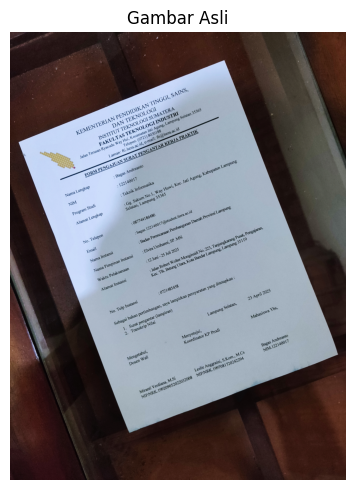

In [260]:
# inisiasi path
img5_path = os.path.join(os.getcwd(), 'assets_ws4', 'soal5OG.jpg')
img5 = cv2.imread(img5_path)
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

# Tampilkan gambar asli
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.imshow(img5)
axs.set_title("Gambar Asli")
axs.axis('off')
plt.tight_layout()
plt.show()

2. Konversi ke grayscale.

In [261]:
# Konversi ke grayscale
img5_gray = cv2.cvtColor(img5, cv2.COLOR_RGB2GRAY)

3. Deteksi tepi dengan cara manual

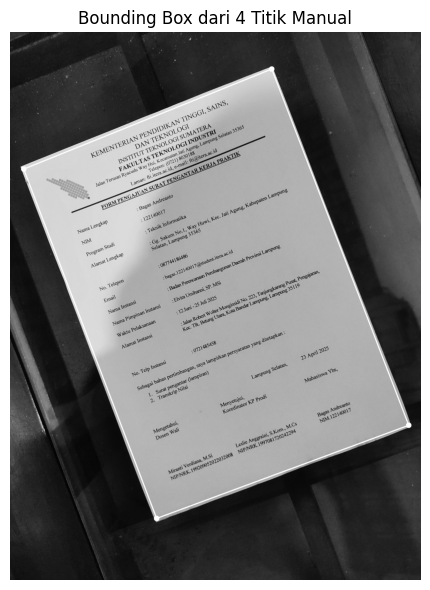

✅ Hasil bounding box manual disimpan sebagai c:\Users\Pongo\OneDrive\Desktop\Git-Upload\Hands-on_Multimedia\results_ws4\Soal5_Manual_Bounding_Box.jpg


In [262]:
# --- Salin gambar grayscale ---
img5_gray_box = img5_gray.copy()

# --- Titik manual ---
points = [(100, 1000), (1910, 270), (2910, 2870), (1070, 3550)]

# Pastikan titik berbentuk numpy array
pts = np.array(points, np.int32)
pts = pts.reshape((-1, 1, 2))

# --- Gambar lingkaran di tiap titik ---
for (x, y) in points:
    cv2.circle(img5_gray_box, (x, y), radius=20, color=(255, 0, 0), thickness=-1)

# --- Gambar garis penghubung (bounding box) ---
cv2.polylines(img5_gray_box, [pts], isClosed=True, color=(255, 255, 255), thickness=8)

# --- Tampilkan hasil ---
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.imshow(img5_gray_box, cmap='gray')
axs.set_title("Bounding Box dari 4 Titik Manual")
axs.axis('off')
plt.tight_layout()
plt.show()

# Simpan hasil bounding box manual
output_path_manual_bbox = os.path.join(output_dir, 'Soal5_Manual_Bounding_Box.jpg')
cv2.imwrite(output_path_manual_bbox, img5_gray_box)
print(f"✅ Hasil bounding box manual disimpan sebagai {output_path_manual_bbox}")

4. Koreksi perspektif (perspective correction)

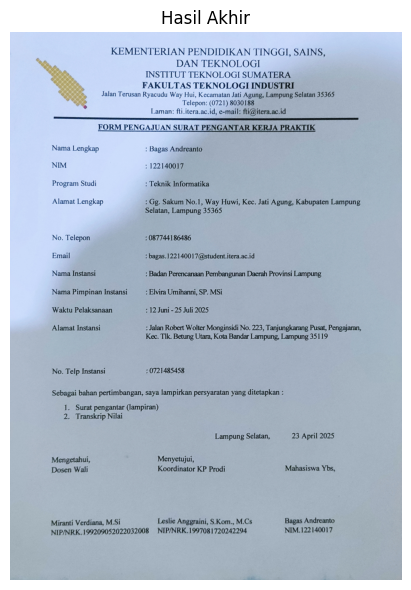

✅ Hasil dokumen disimpan sebagai c:\Users\Pongo\OneDrive\Desktop\Git-Upload\Hands-on_Multimedia\results_ws4\Soal5_Document_Scanned.jpg


In [263]:
# Asumsi: `points` adalah daftar titik sudut dokumen
pts_src = np.float32(points)

pts_src = np.array(sorted(pts_src, key=lambda x: (x[1], x[0])))  
pts_src = np.float32([pts_src[0], pts_src[1], pts_src[2], pts_src[3]])

# Tentukan ukuran output (misal A4: 1000x1400 pixels)
width, height = 1000, 1400
pts_dst = np.float32([
    [0, 0],
    [width - 1, 0],
    [0, height - 1],
    [width - 1, height - 1]
])

# Hitung matriks transformasi dan lakukan warp
matrix = cv2.getPerspectiveTransform(pts_src, pts_dst)
warped = cv2.warpPerspective(img5, matrix, (width, height))

# Flip horizontal dokumen
warped = cv2.flip(warped, 1)

# Tampilkan hasil
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.imshow(warped)
axs.set_title("Hasil Akhir")
axs.axis('off')
plt.tight_layout()
plt.show()

# Simpan hasil akhir dokumen
output_path_document = os.path.join(output_dir, 'Soal5_Document_Scanned.jpg')
cv2.imwrite(output_path_document, cv2.cvtColor(warped, cv2.COLOR_RGB2BGR))
print(f"✅ Hasil dokumen disimpan sebagai {output_path_document}")

5. adaptive thresholding

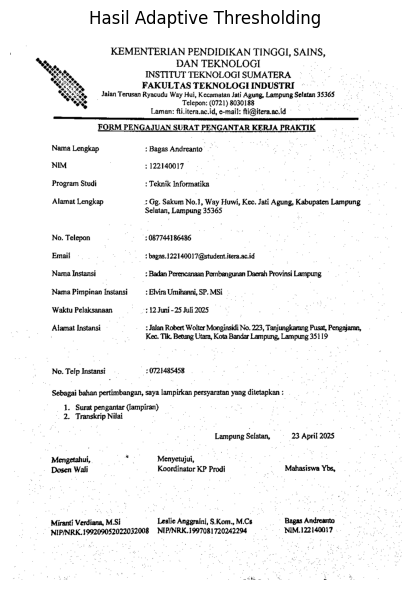

✅ Hasil adaptive thresholding disimpan sebagai c:\Users\Pongo\OneDrive\Desktop\Git-Upload\Hands-on_Multimedia\results_ws4\Soal5_Document_Adaptive_Thresholding.jpg


In [264]:
# Konversi hasil warp ke grayscale
warped_gray = cv2.cvtColor(warped, cv2.COLOR_RGB2GRAY)

# Adaptive Thresholding
img_adapt = cv2.adaptiveThreshold(
    warped_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 51, 10
)

# Tampilkan hasil adaptive thresholding
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.imshow(img_adapt, cmap='gray')
axs.set_title("Hasil Adaptive Thresholding")    
axs.axis('off')
plt.tight_layout()
plt.show()

# Simpan hasil adaptive thresholding
output_path_adapt = os.path.join(output_dir, 'Soal5_Document_Adaptive_Thresholding.jpg')
cv2.imwrite(output_path_adapt, img_adapt)
print(f"✅ Hasil adaptive thresholding disimpan sebagai {output_path_adapt}")

6. Menampilkan setiap tahap pemrosesan dalam satu grid agar mudah dibandingkan.

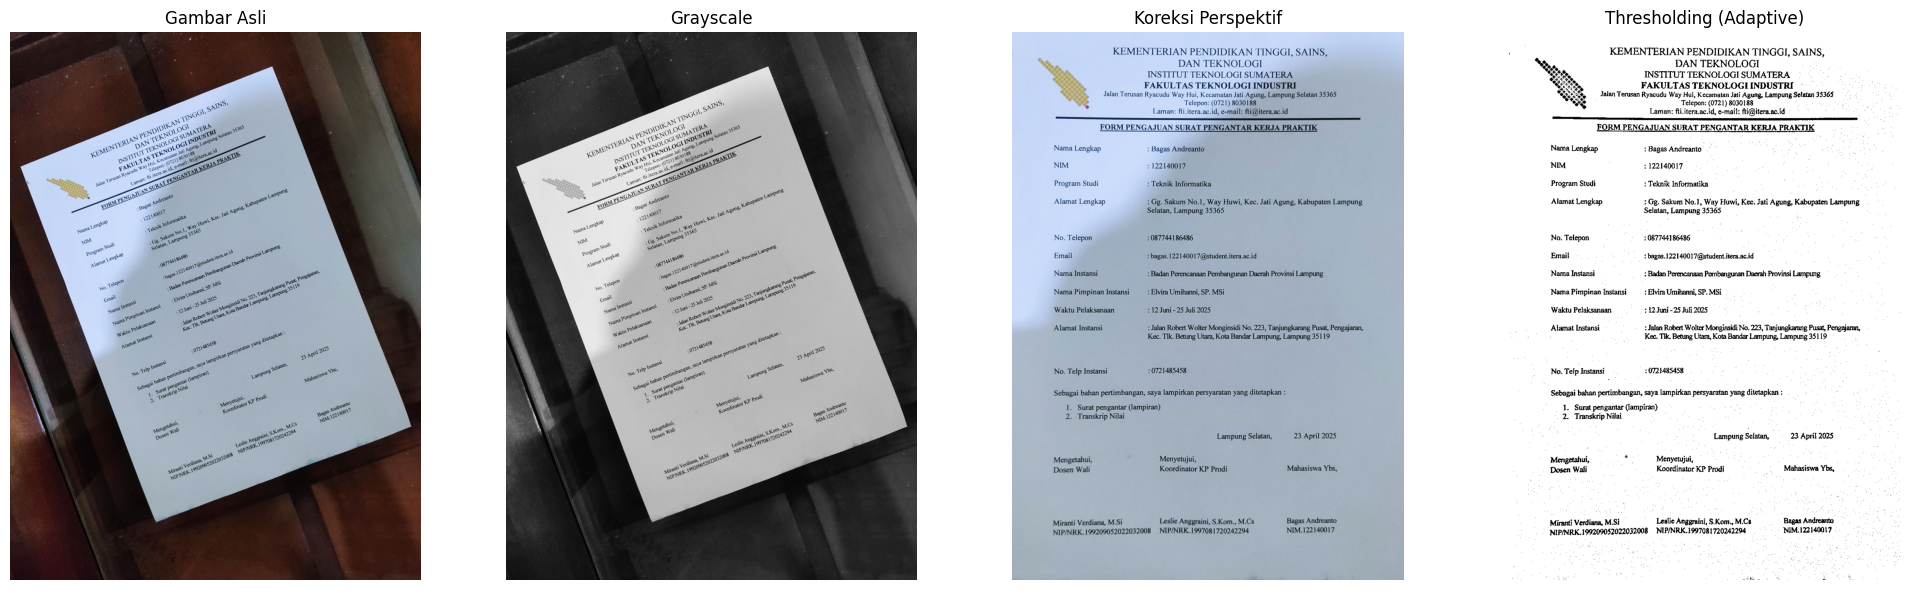

In [265]:
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

axs[0].imshow(img5)
axs[0].set_title("Gambar Asli")
axs[0].axis('off')

axs[1].imshow(img5_gray, cmap='gray')
axs[1].set_title("Grayscale")
axs[1].axis('off')

axs[2].imshow(warped)
axs[2].set_title("Koreksi Perspektif")
axs[2].axis('off')

axs[3].imshow(img_adapt, cmap='gray')
axs[3].set_title("Thresholding (Adaptive)")
axs[3].axis('off')

plt.tight_layout()
plt.show()


#### Penjelasan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra:**

1. **Konversi ke Grayscale**: Mengubah gambar berwarna menjadi skala abu-abu untuk menyederhanakan informasi visual. Hal ini membantu dalam fokus pada struktur dan kontur objek tanpa gangguan warna.
2. **Deteksi Tepi Manual**: Mendeteksi tepi objek dalam gambar secara manual untuk menyoroti batas-batas dokumen agar lebih akurat.
3. **Koreksi Perspektif**: Menggunakan transformasi homografi berdasarkan 4 titik manual untuk memperbaiki distorsi perspektif pada gambar. Hal ini membuat objek datar terlihat sejajar dan proporsional, sehingga memudahkan pembacaan atau analisis lebih lanjut.
4. **Thresholding Adaptif**: Menerapkan thresholding adaptif untuk karena lebih sesuai untuk mengatasi pencahayaan dokumen yang tidak merata (satu sisi terang, sisi lainnya gelap) karena terkena bayangan tangan.

### **Lampiran**

#### **Referensi Materi:**
1.  [Materi 1](https://github.com/informatika-itera/IF25-40305-handson/blob/main/8_image_processing_week1.ipynb)  
2.  [Materi 2](https://github.com/informatika-itera/IF25-40305-handson/blob/main/9_image_processing_week2.ipynb)

#### **Bantuan AI (GPT-4):**
1.  [Link Chat GPT 1](https://chatgpt.com/share/69163ecd-2a7c-8006-b48c-db12f8da4bb1)  
2.  [Link Chat GPT 2](https://chatgpt.com/share/69163edd-fcfc-8006-8347-9d602f76b2a8)


---

### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.